In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('cleaned_data.csv')

In [ ]:
data = pd.read_csv('cleaned_data.csv')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Impute missing values, for example with the median for numerical data
imputer = SimpleImputer(strategy='median')
data['User-Age'] = imputer.fit_transform(data[['User-Age']])

# Prepare for encoding categorical variables
# Calling fit_transform on the label encoder will return an array of encoded values
# Using a different encoder for each column
label_encoders = {}
categorical_columns = ['User-City', 'User-State', 'User-Country', 'Book-Author', 'Book-Publisher', 'Series-Title']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store each encoder to use later for inverse_transform or for new data

# Prepare features and labels
X = data.drop(columns=['User-ID', 'ISBN', 'Book-Title', 'Genre', 'Book-Author', 'Book-Publisher', 
                       'Series-Title',
                       'Year-Of-Publication',
                       'Book-Rating'
                       #'User-City', 'User-State', 'User-Country'
                       ])
genre_encoder = LabelEncoder()
y = genre_encoder.fit_transform(data['Genre'])  # Encoding the target variable with a separate encoder

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# DECISION TREE

# Grid Search Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
clf = DecisionTreeClassifier(random_state=42)

# Create a dictionary of all the parameters you want to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [10, 20, 50, 100],
    'min_samples_leaf': [10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



First, the DecisionTreeClassifier is initialized with a random_state to ensure reproducibility. A dictionary named param_grid is created, containing lists of values for four hyperparameters: max_depth, min_samples_split, min_samples_leaf, and criterion, which the grid search will iterate over to find the best combination. The GridSearchCV object is then set up with the decision tree as the estimator, the parameter grid, and specifications such as the number of cross-validation folds (cv=5), the scoring metric (accuracy). The grid search is executed by fitting it to the training data (X_train, y_train). Finally, the best parameters and the highest cross-validation accuracy score are printed, which indicates the most effective settings for the decision tree model under the conditions specified.

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_split=50, min_samples_leaf=20)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# More detailed performance analysis
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.31
              precision    recall  f1-score   support

           0       0.32      0.53      0.40      1404
           1       0.30      0.58      0.39      1401
           2       0.00      0.00      0.00       361
           3       0.33      0.03      0.06       188
           4       0.00      0.00      0.00       188
           5       0.00      0.00      0.00       292
           6       0.00      0.00      0.00       380
           7       0.00      0.00      0.00       212
           8       0.29      0.02      0.03       720

    accuracy                           0.31      5146
   macro avg       0.14      0.13      0.10      5146
weighted avg       0.22      0.31      0.22      5146



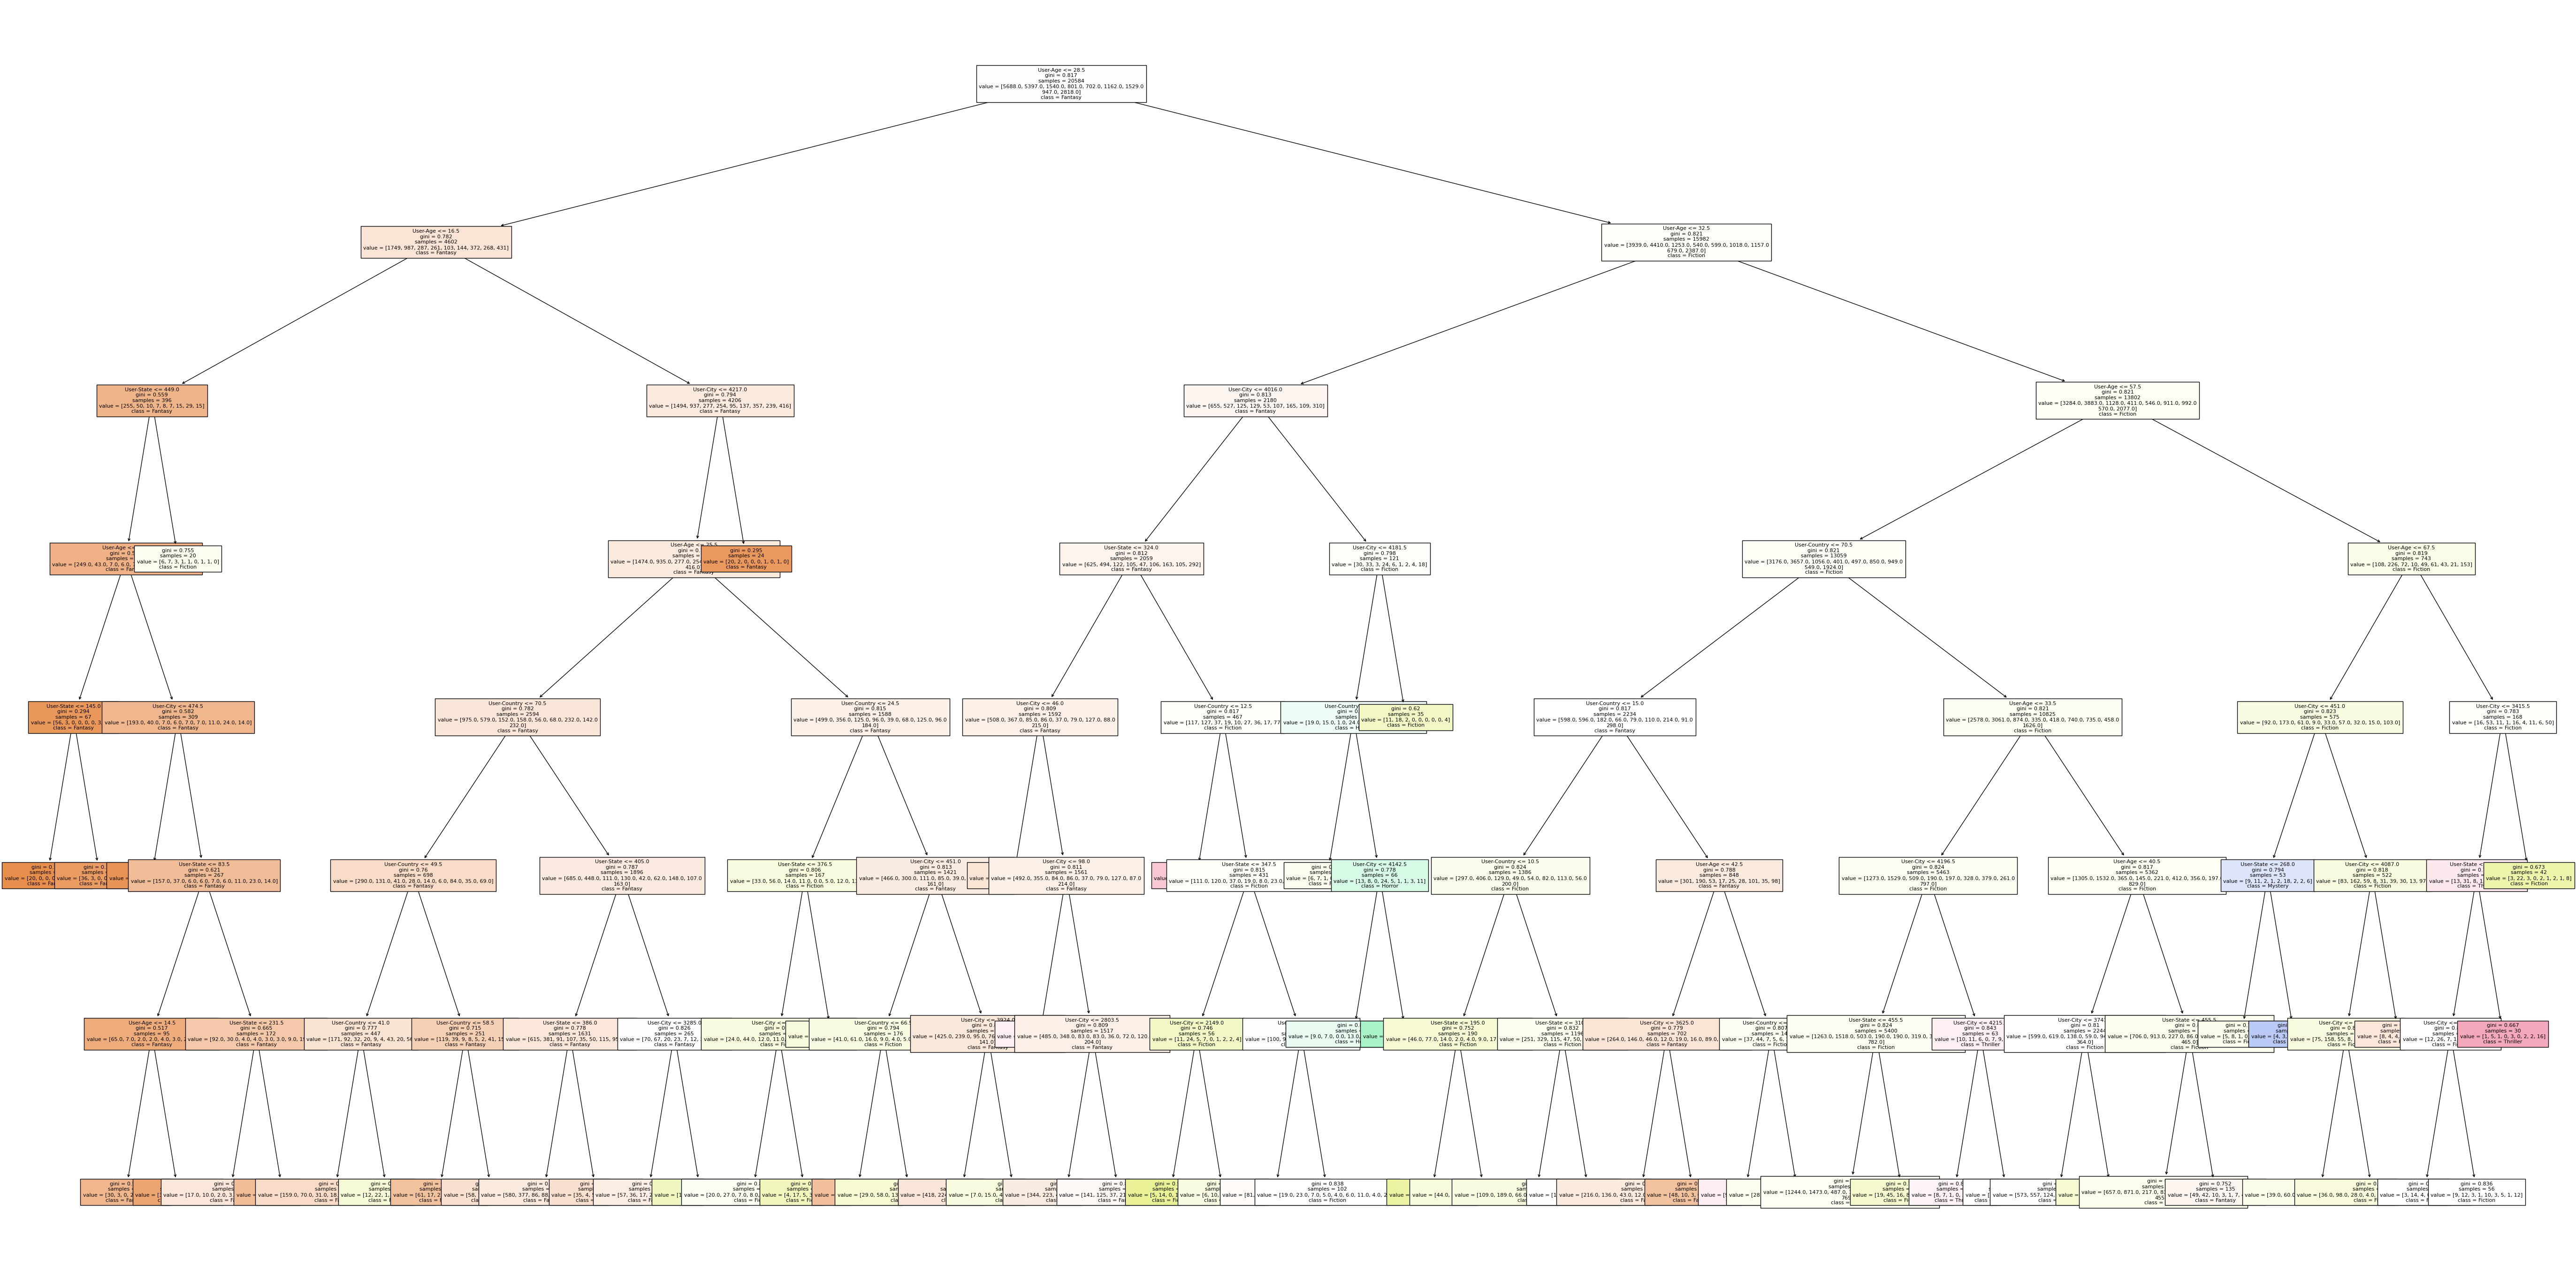

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming clf is your trained decision tree classifier

fig, ax = plt.subplots(figsize=(60, 30))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

tree.plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=genre_encoder.classes_,  # Use genre_encoder's classes for the class names
    fontsize=8,
    ax=ax
)

plt.savefig('adjusted_decision_tree_no_param_change.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
